# Generador de $t$ de Student

In [1]:
import numpy as np
import seaborn as sns
from scipy.special import gamma
sns.set_theme()

Si tenemos  $Z\sim\mathcal{N}(0,1)$  y  $U\sim\chi^2(k)$, entonces $$\frac{Z}{\sqrt{U/k}}\sim t_{(k)}$$

Teniendo el teorema anterior, procederemos a implementarlo para obtener muestras de la distribución $t$ de Student

In [2]:
def t_student(k):
    Z = np.random.normal()
    U = np.random.chisquare(k)
    t_k = np.divide(Z, np.sqrt(np.divide(U, k)))
    return t_k
def density_t(x,v):
    factor = gamma((v+1)/2) / (np.sqrt(v*np.pi)*gamma(v/2))
    resultado = factor * np.pow((1+x**2/v),-((v+1)/2))
    return resultado

CPU times: total: 609 ms
Wall time: 608 ms


<Axes: ylabel='Count'>

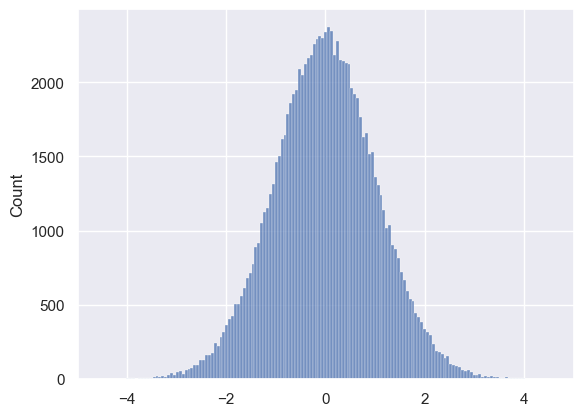

In [3]:
%%time
k = 50 #corresponde al grado de libertad
n = 100000 #corresponde al numero de muestras que tomaremos
muestra = [t_student(k) for i in range(n)]
sns.histplot(muestra)

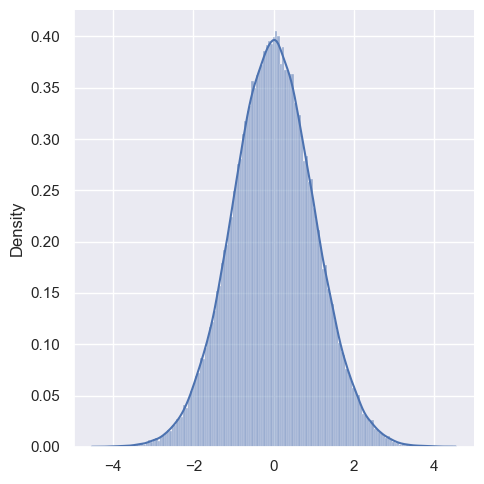

In [4]:
sns.displot(muestra, stat="density",kde=True)#True o 1

<Axes: ylabel='Density'>

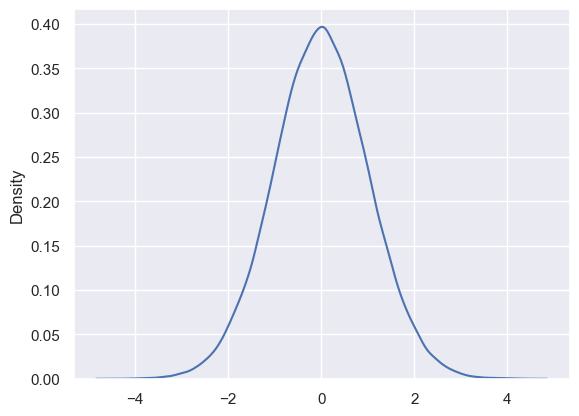

In [5]:
sns.kdeplot(muestra)

# Falta comparar la densidad muestral con la distribución

<Axes: ylabel='Density'>

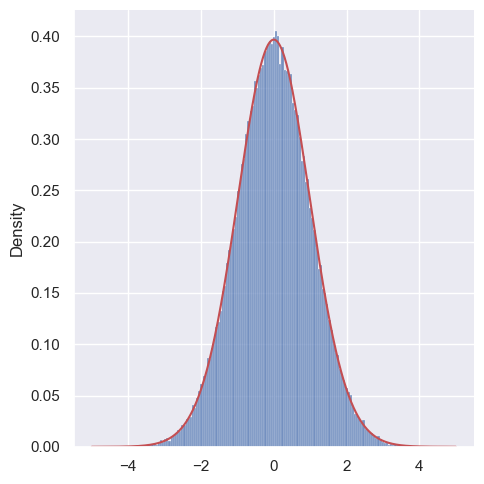

In [8]:
sns.displot(muestra, stat="density")#True o 1
X = np.linspace(-5,5,1000)
Y = density_t(X, k)
sns.lineplot(x=X, y=Y, color='r')